<a href="https://colab.research.google.com/github/Sangee-28/GuviTasks/blob/main/Copy_of_KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

**Importing the dataset**

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [ ]:
df.head()
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df.iloc[:,2:4]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=111) # split the data 
X_train

,Age,EstimatedSalary
353,37,57000
132,30,87000
114,42,80000
240,42,149000
384,57,33000
...,...,...
275,57,74000
86,24,55000
212,59,42000
364,42,104000


**Feature Scaling**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train) # compute mu and sigma
X_train = scaler.transform(X_train)
# wrong - never call scaler fit on test again - scaler.fit(X_test)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import roc_auc_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])) #predicting using the model

K value  :  1  score :  0.80770887166236
K value  :  2  score :  0.8934108527131783
K value  :  3  score :  0.912575366063738
K value  :  4  score :  0.9191429801894918
K value  :  5  score :  0.9565030146425494
K value  :  6  score :  0.9667312661498708
K value  :  7  score :  0.9690999138673557
K value  :  8  score :  0.9688845822566752
K value  :  9  score :  0.9681309216192936
K value  :  10  score :  0.975452196382429
K value  :  20  score :  0.9810508182601205
K value  :  50  score :  0.9823428079242033


In [ ]:

from sklearn.model_selection import cross_val_score
data = pd.read_csv('Social_Network_Ads.csv')
x = data[['Age','EstimatedSalary']].values
y = data['Purchased'].astype(int).values
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x,y)
  print("K value : ", k, " train score : ", clf.score(x,y) , " test score : ", cross_val_score(clf,x,y,cv = 10, scoring = 'accuracy').mean())

K value :  1  train score :  0.995  test score :  0.8025
K value :  2  train score :  0.9025  test score :  0.7875
K value :  3  train score :  0.8975  test score :  0.7875000000000001
K value :  4  train score :  0.8625  test score :  0.7925
K value :  5  train score :  0.8725  test score :  0.7849999999999999
K value :  6  train score :  0.8625  test score :  0.7825
K value :  7  train score :  0.87  test score :  0.7949999999999999
K value :  8  train score :  0.8475  test score :  0.785
K value :  9  train score :  0.875  test score :  0.7849999999999999
K value :  10  train score :  0.8475  test score :  0.76
K value :  20  train score :  0.8175  test score :  0.7725
K value :  40  train score :  0.8025  test score :  0.7775000000000001
K value :  80  train score :  0.7725  test score :  0.7675000000000001


In [ ]:
#Input :  k and data
#Output : The graph of the decision boundary
def knn_comparison(data, k): #k and the data are input to the function
  x = data[['Age','EstimatedSalary']].values # independent features
  y = data['Purchased'].astype(int).values # y -> target/true labels 
  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
  clf.fit(x, y) # train the model
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=10)))
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2) # it plots the decision boundary
  ##Adding axes annotations
  plt.xlabel('X') #Names the x-axis
  plt.ylabel('Y') #Names the y-axis
  plt.title('Knn with K='+ str(k)) #Names the graph
  plt.show() #Displays the graph 

def knn_no_plot(data, k): #k and the data are input to the function
  x = data[['Age','EstimatedSalary']].values # independent features
  y = data['Purchased'].astype(int).values # y -> target/true labels 
  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
  clf.fit(x, y) # train the model
  print("K : ", k, " Train Accuracy : ", clf.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))  # test the model and it computes the accuracy (train data accuracy)
  # Plotting decision region
  # plot_decision_regions(x, y, clf=clf, legend=2) # it plots the decision boundary
  # # Adding axes annotations
  # plt.xlabel('X') #Names the x-axis
  # plt.ylabel('Y') #Names the y-axis
  # plt.title('Knn with K='+ str(k)) #Names the graph
  # plt.show() #Displays the graph 

#Same as aboe, but with logreg
def logistic(data, k = 0):
  x =data[['Age','EstimatedSalary']].values
  y = data['Purchased'].astype(int).values
  clf = LogisticRegression()
  clf.fit(x, y)
  print(clf.score(x,y))
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Losgistic Regression decision boundary')
  plt.show()

0.6425
Train Accuracy :  0.6425
Val Accuracy :  0.675


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


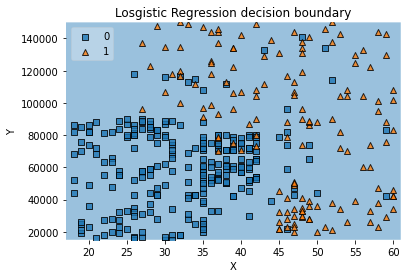

In [ ]:
logistic(data)

**Predicting the Test set results**

In [ ]:
knn.predict_proba(X_test)
knn.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1])

**Making the Confusion Matrix**

In [ ]:
cnf_matrix = confusion_matrix(y_test, knn.predict(X_test))
cnf_matrix

array([[85,  1],
       [22, 32]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, knn.predict(X_test)))

0.8357142857142857


In [ ]:
from sklearn.metrics import precision_score
print("Precision: {0}".format(precision_score(y_test, knn.predict(X_test))))

Precision: 0.9696969696969697


In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

0.9823428079242033